In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("E:\Conda projects/data/dirk.csv")

import sys
sys.path.append(r"E:\Conda projects")
from src.utils import validate_dataset

validate_dataset(df, "Dirk per game stats")

features = ["MP", "FGA", "3PA", "FTA", "ORB", "DRB"]

X = df[features]
y = df["PTS"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", round(mae,2))
print("R2:", round(r2,3))

In [ ]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values("Coefficient", ascending=False)

coef_df

In [3]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("RF MAE:", mean_absolute_error(y_test, rf_pred))

RF MAE: 2.344700000000004


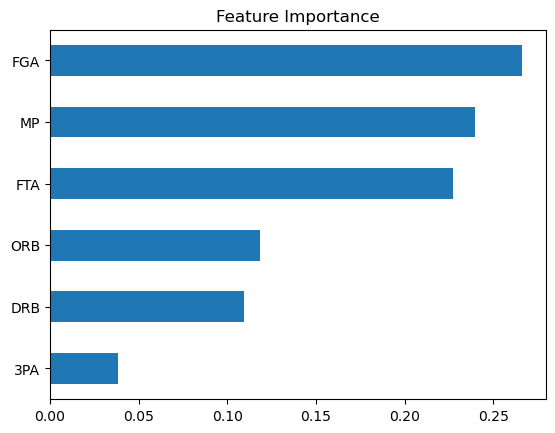

In [6]:
importances = rf.feature_importances_

pd.Series(importances, index=features)\
  .sort_values()\
  .plot(kind="barh", title="Feature Importance")

plt.show()